In [85]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
#import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#classification.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection, tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics


In [145]:
house = pd.read_csv("C:/Users/dsouz/Desktop/ALY6020/Nashville_housing_data_2013_2016.csv")

In [146]:
house = house.replace(' ', np.nan)    


In [147]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [148]:
house.shape

(56636, 31)

In [149]:
house_new = house

In [150]:
house3 = house

<AxesSubplot:>

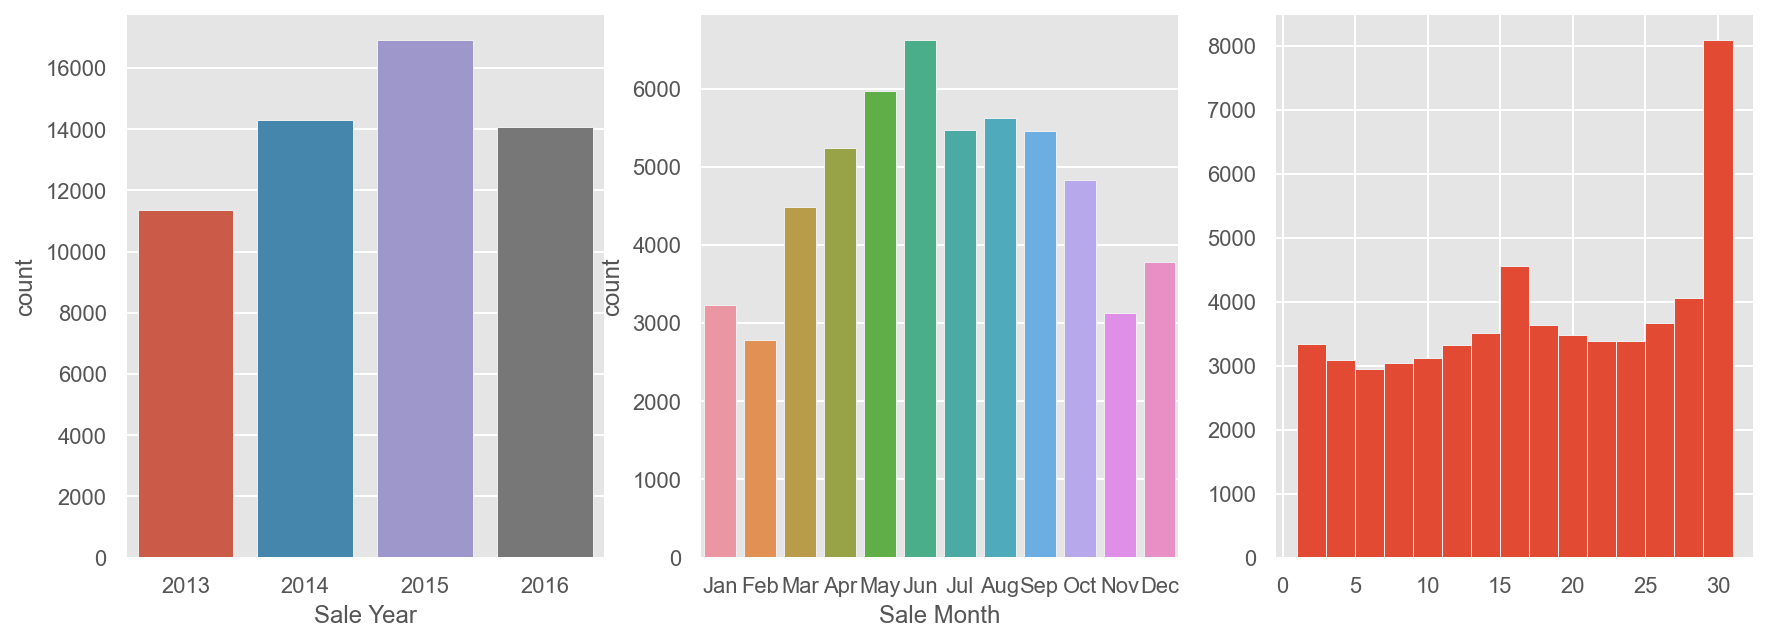

In [142]:
# split the data based on year of sale. 
house3['Sale Year'] = house3['Sale Date'].str[:4]
house3['Month'] = house3['Sale Date'].str[5:7]
house3['Day'] = house3['Sale Date'].str[8:10]
house3['Sale Month'] = house3.Month.map({'01': 'Jan', '02': 'Feb', '03': 'Mar', '04':'Apr','05': 'May',
                                           '06': 'Jun','07': 'Jul','08': 'Aug','09': 'Sep','10': 'Oct',
                                           '11': 'Nov','12': 'Dec'})
house3['Sale Day'] = house3.Day.astype(float)
house3.drop('Month', axis=1)
house3.drop('Day', axis=1)

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(13,5))
sns.countplot(x='Sale Year', data=house3, ax = axis1)
sns.countplot(x='Sale Month', data=house3, ax = axis2)
house3['Sale Day'].hist(bins = 15, ax= axis3)

In [151]:
#house.head()
#house[house['Total Value'] == ''].index

array([[<AxesSubplot:title={'center':'Sale Price'}>,
        <AxesSubplot:title={'center':'Acreage'}>,
        <AxesSubplot:title={'center':'Land Value'}>],
       [<AxesSubplot:title={'center':'Building Value'}>,
        <AxesSubplot:title={'center':'Total Value'}>,
        <AxesSubplot:title={'center':'Finished Area'}>],
       [<AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'Full Bath'}>,
        <AxesSubplot:title={'center':'Half Bath'}>]], dtype=object)

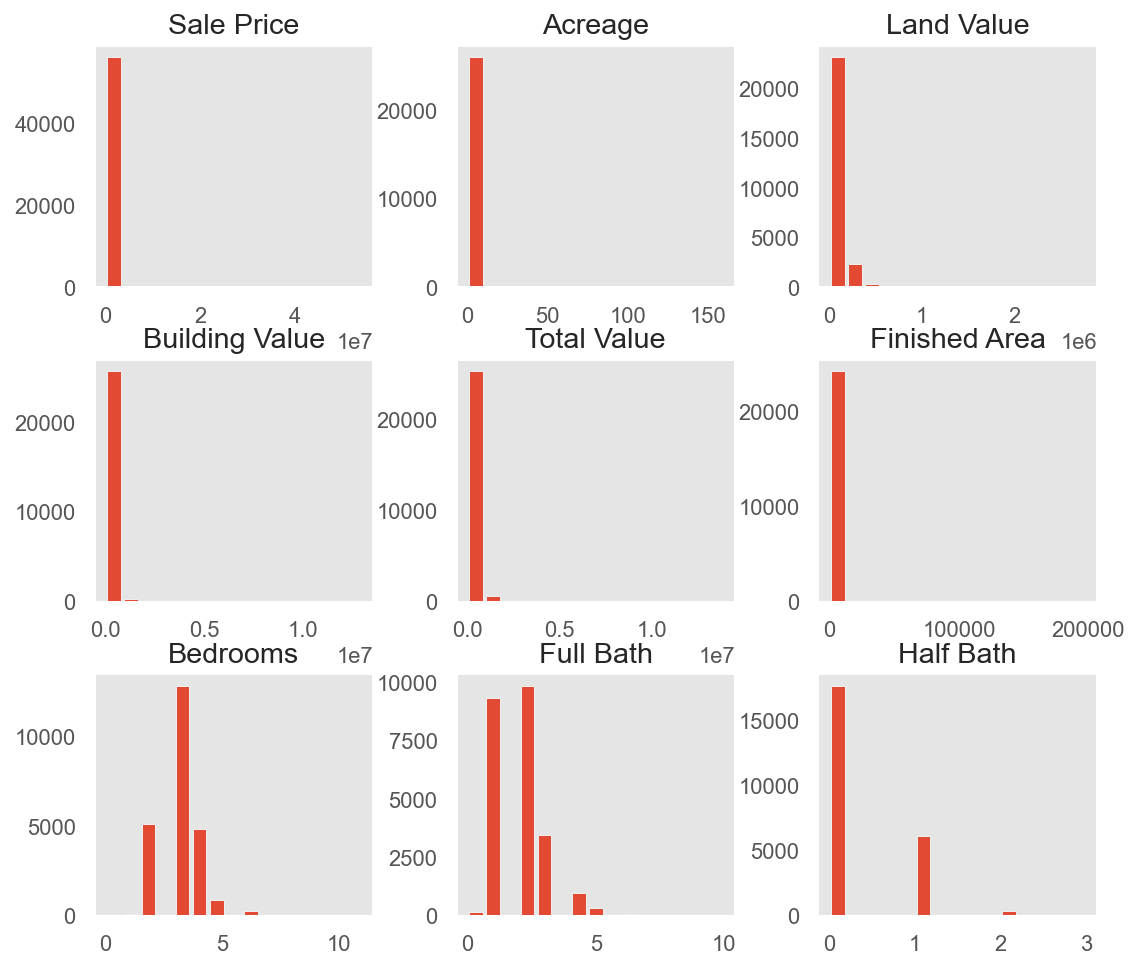

In [155]:
#Exploratory data analysis. PLotting a histogram
house_new[['Land Use', 'Sale Price', 'City', 'Acreage', 'Tax District', 'Land Value', 'Building Value', 'Total Value', 'Finished Area', 'Foundation Type', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath']].hist(bins=15, figsize= (8,8), grid=False, rwidth= 0.8)

In [156]:
# Renaming a few columns
house_new = house_new.rename(columns={'Sale Price': 'SalePrice'}) 

In [157]:
cor_mat= house_new[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [158]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice         1.000000
Total Value       0.661740
Finished Area     0.634628
Land Value        0.603653
Building Value    0.574624
Full Bath         0.512608
Bedrooms          0.372739
Half Bath         0.239271
Acreage           0.201185
Neighborhood      0.057126
Year Built        0.037270
Unnamed: 0.1      0.017492
Unnamed: 0        0.017492
Name: SalePrice, dtype: float64

# Cleaning the data

In [159]:
#Checking for null values. 

null_values = house_new.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(house_new)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
Suite/ Condo #,5052700,89.214
Half Bath,3249000,57.366
Bedrooms,3247700,57.343
Foundation Type,3247200,57.335
Grade,3247100,57.333
Exterior Wall,3247100,57.333
Year Built,3247100,57.333
Finished Area,3247000,57.331
Full Bath,3235900,57.135
Owner Name,3137500,55.398


In [160]:
#Imputing null values with zero in all the numerical columns
house_new['Half Bath'].fillna(house_new['Half Bath'].mode()[0],inplace = True)
house_new['Bedrooms'].fillna(house_new['Bedrooms'].mode()[0],inplace = True)
house_new['Full Bath'].fillna(house_new['Full Bath'].mode()[0],inplace = True)
house_new['Acreage'].fillna(house_new['Acreage'].mode()[0],inplace = True)
house_new['Land Value'].fillna(house_new['Land Value'].mode()[0],inplace = True)
house_new['Building Value'].fillna(house_new['Building Value'].mode()[0],inplace = True)
house_new['Total Value'].fillna(house_new['Total Value'].mode()[0],inplace = True)
house_new['Finished Area'].fillna(house_new['Finished Area'].mode()[0],inplace = True)

In [161]:
#Checking for null values. 

null_values = house_new.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(house_new)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
Suite/ Condo #,5052700,89.214
Foundation Type,3247200,57.335
Grade,3247100,57.333
Year Built,3247100,57.333
Exterior Wall,3247100,57.333
Owner Name,3137500,55.398
image,3130100,55.267
Address,3061900,54.063
City,3061900,54.063
Tax District,3061900,54.063


In [162]:
house_new.isnull().any()

Unnamed: 0.1                         False
Unnamed: 0                           False
Parcel ID                            False
Land Use                             False
Property Address                      True
Suite/ Condo   #                      True
Property City                         True
Sale Date                            False
SalePrice                            False
Legal Reference                      False
Sold As Vacant                       False
Multiple Parcels Involved in Sale    False
Owner Name                            True
Address                               True
City                                  True
State                                 True
Acreage                              False
Tax District                          True
Neighborhood                          True
image                                 True
Land Value                           False
Building Value                       False
Total Value                          False
Finished Ar

In [163]:
#Removing unwanted and least important columns
house_new = house_new.drop(['Unnamed: 0', 'Unnamed: 0.1', 'image', 'Property Address', 'Property City', 'Sale Date',
                            'Legal Reference','Suite/ Condo   #', 'City', 'State', 'Grade', 'Exterior Wall',
                            'Owner Name', 'Address', 'Neighborhood', 'Year Built'], axis = 1)

In [164]:
#Removing unwanted and least important columns
house_new = house_new.drop(['Parcel ID', 'Land Use', 'Tax District', 'Foundation Type' ], axis = 1)

In [165]:
house_new.shape

(56636, 11)

# Data Preparation

In [166]:
#Label encoding the categorical variables


data= house_new

#Encoding Categorical Descritpive features
categorical_cols = data.columns[data.dtypes==object].tolist()

In [167]:
categorical_cols

['Sold As Vacant', 'Multiple Parcels Involved in Sale']

In [168]:
#Setting Sold As Vacant Yes and No as 0 and 1
data['Sold As Vacant']=data['Sold As Vacant'].map({'No': 0, 'Yes': 1})  
data.head()

,SalePrice,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Total Value,Finished Area,Bedrooms,Full Bath,Half Bath
0,132000,0,No,0.17,25000.0,0.0,11000.0,1100.00000,3.0,2.0,0.0
1,191500,0,No,0.17,32000.0,134400.0,168300.0,1149.00000,2.0,1.0,0.0
2,202000,0,No,0.11,34000.0,157800.0,191800.0,2090.82495,3.0,2.0,1.0
3,32000,0,No,0.17,25000.0,243700.0,268700.0,2145.60001,4.0,2.0,0.0
4,102000,0,No,0.34,25000.0,138100.0,164800.0,1969.00000,2.0,1.0,0.0


In [169]:
data['Multiple Parcels Involved in Sale']=data['Multiple Parcels Involved in Sale'].map({'No': 0, 'Yes': 1})  
data.head()

,SalePrice,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Total Value,Finished Area,Bedrooms,Full Bath,Half Bath
0,132000,0,0,0.17,25000.0,0.0,11000.0,1100.00000,3.0,2.0,0.0
1,191500,0,0,0.17,32000.0,134400.0,168300.0,1149.00000,2.0,1.0,0.0
2,202000,0,0,0.11,34000.0,157800.0,191800.0,2090.82495,3.0,2.0,1.0
3,32000,0,0,0.17,25000.0,243700.0,268700.0,2145.60001,4.0,2.0,0.0
4,102000,0,0,0.34,25000.0,138100.0,164800.0,1969.00000,2.0,1.0,0.0


In [171]:
#Checking if all the null values have been taken care of 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SalePrice                          56636 non-null  int64  
 1   Sold As Vacant                     56636 non-null  int64  
 2   Multiple Parcels Involved in Sale  56636 non-null  int64  
 3   Acreage                            56636 non-null  float64
 4   Land Value                         56636 non-null  float64
 5   Building Value                     56636 non-null  float64
 6   Total Value                        56636 non-null  float64
 7   Finished Area                      56636 non-null  float64
 8   Bedrooms                           56636 non-null  float64
 9   Full Bath                          56636 non-null  float64
 10  Half Bath                          56636 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 4.8 MB


In [108]:
cor_mat= data[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [109]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice                            1.000000
Multiple Parcels Involved in Sale    0.239940
Land Value                           0.144339
Total Value                          0.133423
Full Bath                            0.117403
Finished Area                        0.114164
Building Value                       0.113477
Bedrooms                             0.075154
Acreage                              0.047338
Half Bath                            0.029458
Sold As Vacant                      -0.009630
Name: SalePrice, dtype: float64

# Preparing the data for modelling

In [110]:
#Defining the independent and dependent variables and preparing the 70/30 split
X = data[[ 'Multiple Parcels Involved in Sale', 'Sold As Vacant', 'Acreage','Land Value', 
               'Building Value', 'Total Value', 'Finished Area',
               'Bedrooms', 'Full Bath', 'Half Bath' ]]#.drop('Response', axis = 1)
y = data['SalePrice'].values.reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [111]:
print(X.shape)
print(y.shape)

(56636, 10)
(56636, 1)


In [112]:
print(X_train.shape)
print(X_test.shape)

(39645, 10)
(16991, 10)


In [172]:
print(y_train.shape)
print(y_test.shape)

(39645, 1)
(16991, 1)


# Linear Regression

In [173]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
pred=reg_lin.predict(X_test)

print("What is the value of the intercept (a)? \n {}".format(reg_lin.intercept_))
print("What is the value of the Slope (b)? \n {}".format(reg_lin.coef_))

#Finding the R-squared value
print(reg_lin.score(X_train,y_train)*100)

print('The mean square error of price and predicted value is: ', np.sqrt(mean_squared_error(y_test,pred)))

What is the value of the intercept (a)? 
 [44882.36391781]
What is the value of the Slope (b)? 
 [[ 1.12759960e+06 -5.95067455e+05 -2.00179166e+03  9.59051595e+00
   8.49265970e+00 -8.10111727e+00  4.42194080e+01 -1.50474023e+04
   3.91579077e+04 -1.60995517e+04]]
12.146830693944688
The mean square error of price and predicted value is:  931160.9396933509


# Multiple Linear Regression

In [174]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)*100
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

print (mlr_score)
print (expl_mlr)

10.153648858947406
-8.32685703863669


<AxesSubplot:title={'center':'Feature Importance'}>

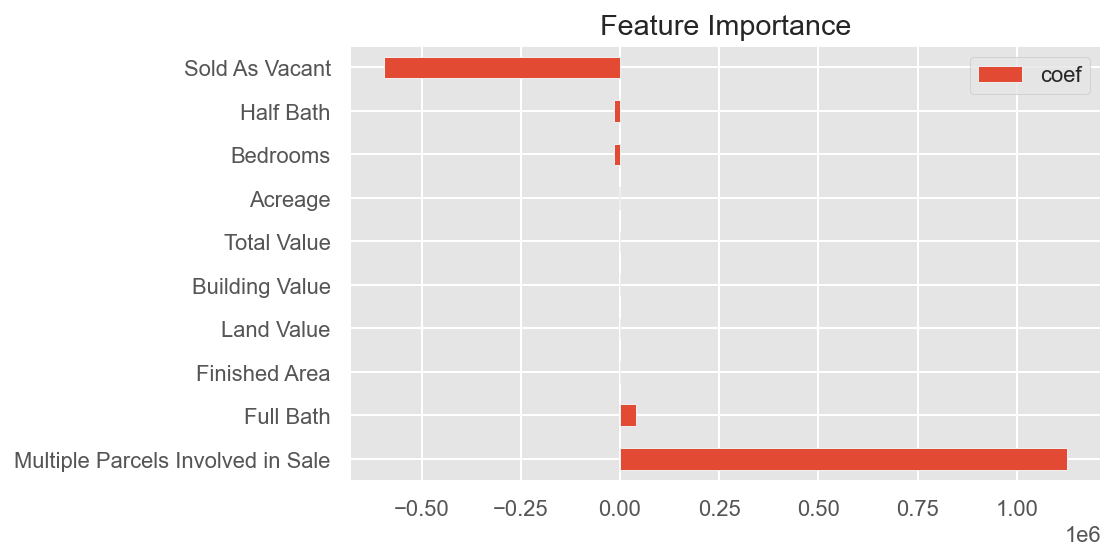

In [175]:
#Feature Importance for logistic Regression
mlr.fit(X_train,y_train)

importance = mlr.coef_[0]

test = pd.DataFrame(importance,
                     X.columns,
                     columns=['coef']).sort_values(by='coef', ascending=False)


test.nlargest(10, ['coef']).plot(kind='barh',title = 'Feature Importance')


# Decision Tree Model

In [185]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
dt_regressor.score(X_test,y_test)
pred_dt = dt_regressor.predict(X_test)
decision_score= dt_regressor.score(X_test,y_test)*100
expl_dt = explained_variance_score(pred_dt,y_test)


print (decision_score)
print(expl_dt)




14.224972723987905
-2.564507512672058


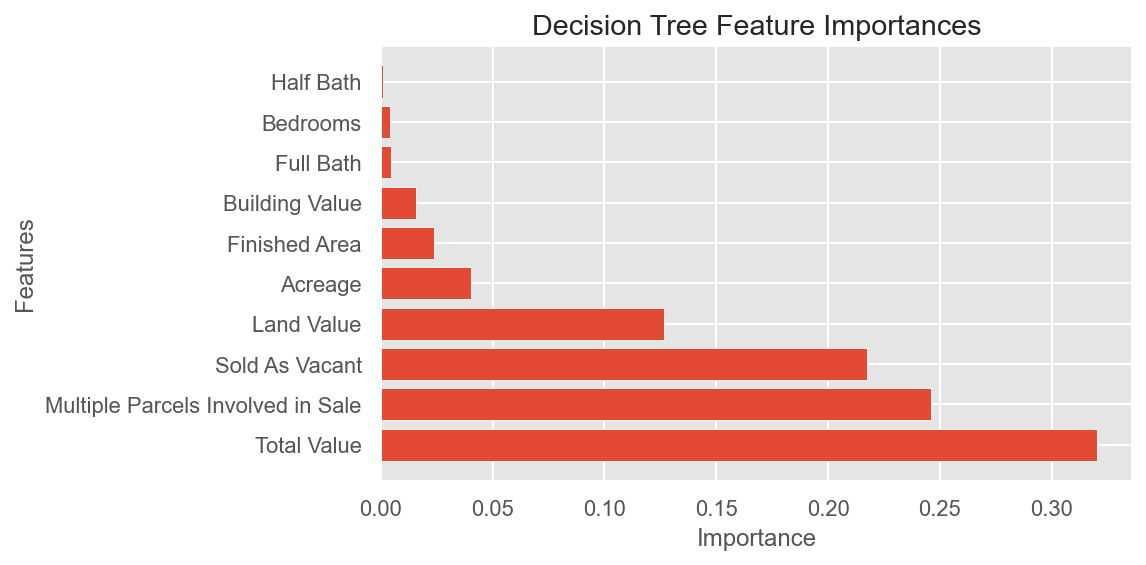

In [186]:
#Feature Importance for Random Forest Regression
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
                 
#                 feature_importances_[fs_indices_rfi]
num_features = 10
fs_indices_dti = np.argsort(dt_regressor.feature_importances_)[::-1][0:num_features]



importance = dt_regressor.feature_importances_[fs_indices_dti]
      
    


best_features_dti = X.columns[fs_indices_dti].values

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()


plot_imp(best_features_dti, importance, 'Decision Tree')


# Random Forest Model

In [178]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)*100
expl_rf = explained_variance_score(rf_pred,y_test)

print (rf_score)
print(expl_rf)

19.118401246190743
-3.4057249004393455


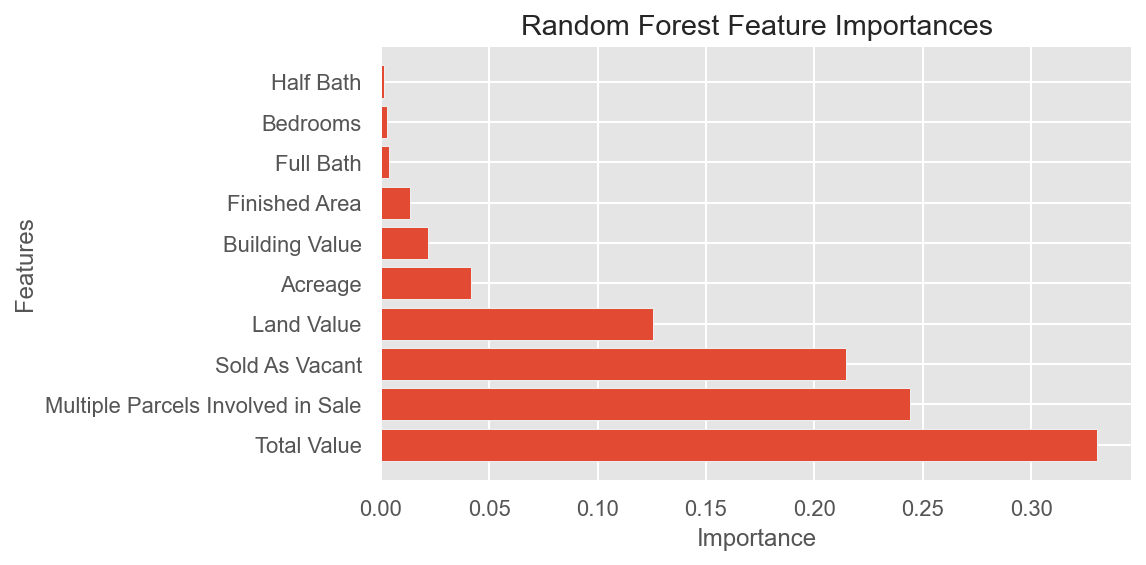

In [179]:
#Feature Importance for Random Forest Regression
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(X_train,y_train)
                 
#                 feature_importances_[fs_indices_rfi]
num_features = 10
fs_indices_rfi = np.argsort(rf_regressor.feature_importances_)[::-1][0:num_features]



importance = rf_regressor.feature_importances_[fs_indices_rfi]
      
    


best_features_rfi = X.columns[fs_indices_rfi].values





import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()


plot_imp(best_features_rfi, importance, 'Random Forest')

# Gradient Boosting

In [180]:
gb_regressor = GradientBoostingRegressor(n_estimators=28,random_state=0)
gb_regressor.fit(X_train,y_train)
gb_regressor.score(X_test,y_test)
gb_pred =gb_regressor.predict(X_test)
gb_score=gb_regressor.score(X_test,y_test)*100
expl_gb = explained_variance_score(gb_pred,y_test)

print (gb_score)
print(expl_gb)

17.005567599010906
-6.0731170250961775


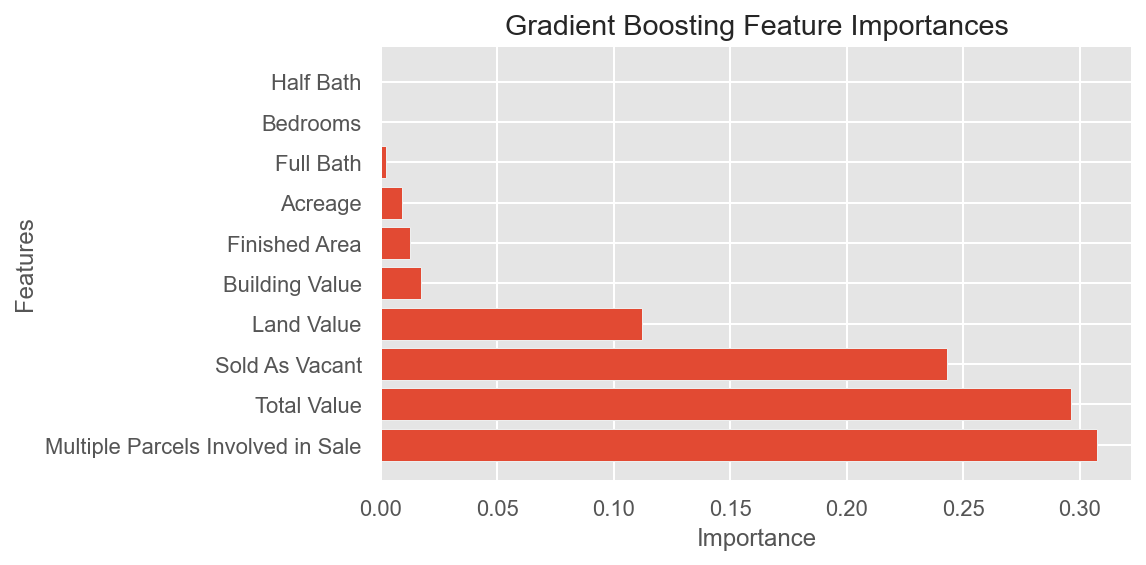

In [181]:
#Feature Importance for Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor(random_state=0)
gb_regressor.fit(X_train,y_train)
                 
#                 feature_importances_[fs_indices_rfi]
num_features = 10
fs_indices_gbi = np.argsort(gb_regressor.feature_importances_)[::-1][0:num_features]



importance = gb_regressor.feature_importances_[fs_indices_gbi]
      
    


best_features_gbi = X.columns[fs_indices_gbi].values

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()


plot_imp(best_features_gbi, importance, 'Gradient Boosting')
